In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Problem Statment: Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled per litre) Using Stochostic Gradient Descent(SGD)

In [2]:
df=pd.read_csv(r"C:\Users\gaikw\Downloads\data.csv")

In [3]:
df.head(3)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,2,3,68.0,46,1613,8.0,1970,volkswagen 1131 deluxe sedan,3.826293
1,2,3,70.0,46,1649,8.5,1970,volkswagen super beetle,4.251437
2,2,3,70.0,48,1755,8.5,1970,volkswagen rabbit custom diesel,4.251437


In [4]:
df.shape

(398, 9)

In [5]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [6]:
df.isna().sum()

origin                 0
cylinders              0
displacement           0
horsepower             2
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [7]:
df['horsepower']

0       46
1       46
2       48
3       48
4       48
      ... 
393      ?
394      ?
395      ?
396    NaN
397    NaN
Name: horsepower, Length: 398, dtype: object

#### There are '?' values in the 'horsepower' column. Let's explore these entries in more detail.


In [10]:
print(f"Total '?' values in horsepower: {(df['horsepower'] == '?').sum()}")

Total '?' values in horsepower: 4


In [11]:
df['horsepower'] = df['horsepower'].replace("?", np.nan)
df['horsepower'].isnull().sum()

6

In [12]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

#### Filling null values with mean value of horsepower

In [14]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df['horsepower'].isnull().sum()

0

In [15]:
df.columns,df.shape

(Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'year', 'name', 'Kilometer_per_liter'],
       dtype='object'),
 (398, 9))

### Checking for Outliers

In [16]:
from scipy import stats
numeric_df = df.select_dtypes(include=[np.number])

# Compute Z-scores
z_scores = np.abs(stats.zscore(numeric_df))

# Count outliers
num_outliers = (z_scores > 3).any(axis=1).sum()

print(f"Total outlier rows (Z-score > 3): {num_outliers}")


Total outlier rows (Z-score > 3): 7


#### Removing all rows from your dataset that contain extreme values (outliers) in any numeric column, where Z-score > 3.

In [19]:
# df = df[(z_scores < 3).all(axis=1)]
# df.shape

### Plotting Histogram

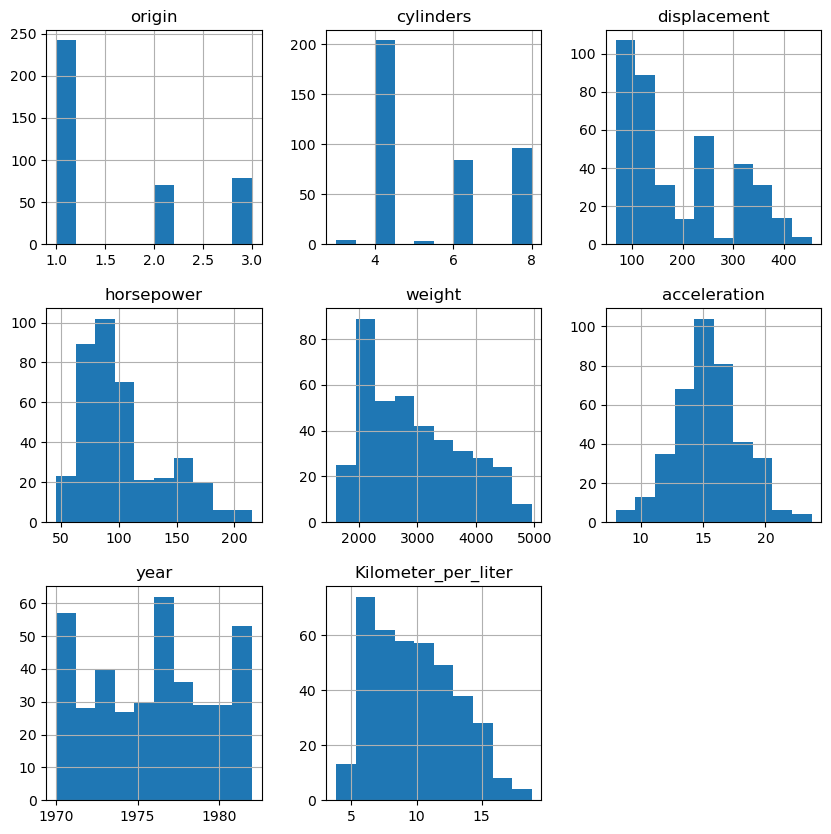

In [20]:
df.hist(figsize=(10, 10))
None

### Checking correlation coefficients of Kilometer_per_liter to df

Kilometer_per_liter    1.000000
weight                 0.995438
year                   0.985097
acceleration           0.983929
displacement           0.977349
horsepower             0.933606
cylinders              0.916605
origin                -0.445986
Name: Kilometer_per_liter, dtype: float64


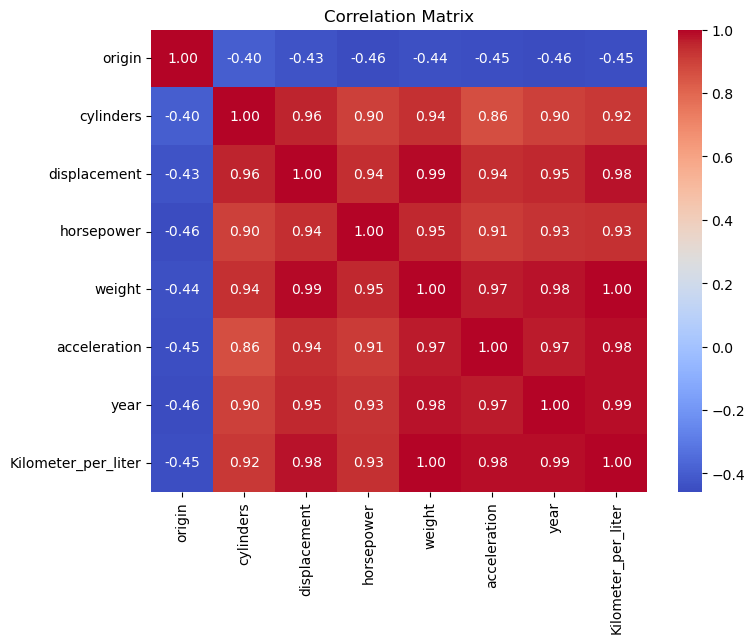

In [21]:
num_df = df.select_dtypes(include=[np.number])
print(num_df.corr()['Kilometer_per_liter'].sort_values(ascending=False))

plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


##### Too Good to Be True lets try SGD if overfits we will perform VIF 

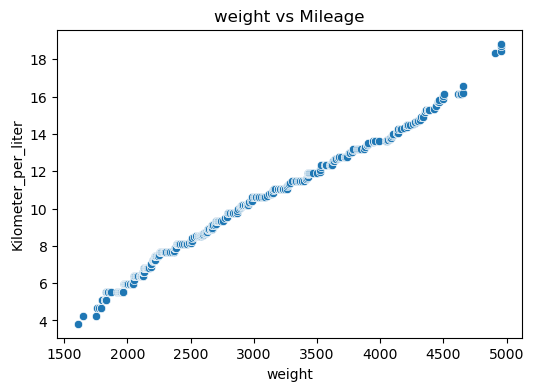

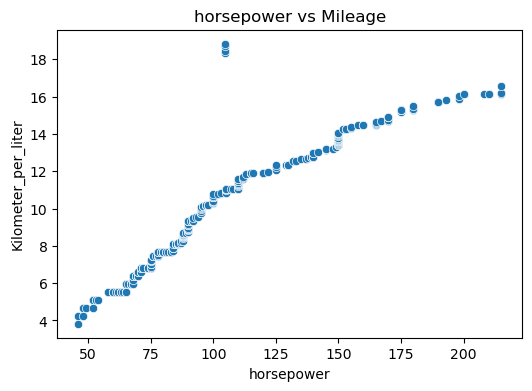

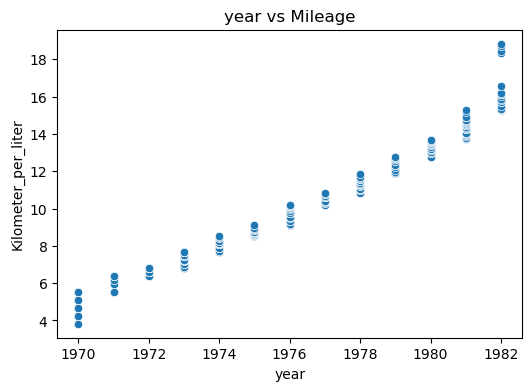

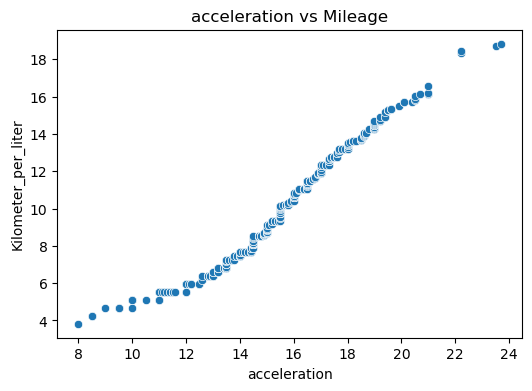

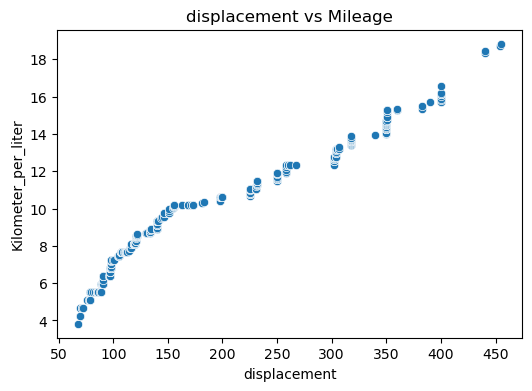

In [22]:
features = ['weight', 'horsepower', 'year', 'acceleration', 'displacement']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['Kilometer_per_liter'])
    plt.title(f"{col} vs Mileage")
    plt.show()


### Importing librarys for SGD ,train_test_split and StandardScaler

In [23]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
### Define features (X) and target variable (y)
X = df.drop(columns=['Kilometer_per_liter', 'name'])  # Exclude target & categorical name
y = df['Kilometer_per_liter']

In [25]:
### Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
### StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
### Initialize and train model
model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)

model.fit(X_train_scaled, y_train)

SGDRegressor(random_state=42)

In [28]:
### Evaluate model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.04600100278283496
R² Score: 1.00


In [29]:
### R² Score: 1.00 says model is overfitted

 ### lets perform Variance Inflation Factor (VIF), which will help identify multicollinearity 

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns=['Kilometer_per_liter', 'name'])
X_num = X.select_dtypes(include=[np.number])
X_const = add_constant(X_num)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_num.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i + 1) for i in range(X_num.shape[1])]

print(vif_data)


        Feature         VIF
0        origin    1.299690
1     cylinders   14.166528
2  displacement  106.441424
3    horsepower   10.516105
4        weight  234.647397
5  acceleration   28.165008
6          year   39.557073


In [31]:
#### Features like weight, displacement, acceleration, and year are too linearly dependent on each other we have to drop them 
#### Reason = There should be No Multicollinearity (Independent variables are not too highly correlated with each other.)

In [32]:
df_reduced = df.drop(columns=['displacement', 'weight', 'acceleration', 'year'])

In [33]:
X_num = df_reduced.drop(columns=['Kilometer_per_liter', 'name'], errors='ignore')
X_const = add_constant(X_num)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_num.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i + 1) for i in range(X_num.shape[1])]
print(vif_data)


      Feature       VIF
0      origin  1.264954
1   cylinders  5.431245
2  horsepower  5.764671


In [34]:
### Define X (Features) and y (Target)

In [35]:
X = df[['origin', 'cylinders', 'horsepower']]
y = df['Kilometer_per_liter']

In [36]:
### Train Test split 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
### Lets perform GridSearchCV with SGDRegressor 

In [39]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'elasticnet'],
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4]
}

grid_search = GridSearchCV(SGDRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

Grid_best_model = grid_search.best_estimator_

In [40]:
## Evaluate GridSearch + SGD Model

In [41]:
y_pred = Grid_best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}, R² Score: {r2:.3f}")

# Optional: Compare train vs test
print("Train R²:", Grid_best_model.score(X_train_scaled, y_train))
print("Test R²:", Grid_best_model.score(X_test_scaled, y_test))


MSE: 0.86, R² Score: 0.922
Train R²: 0.8886892613584628
Test R²: 0.9224084794439982


In [42]:
#### Plot residuals 


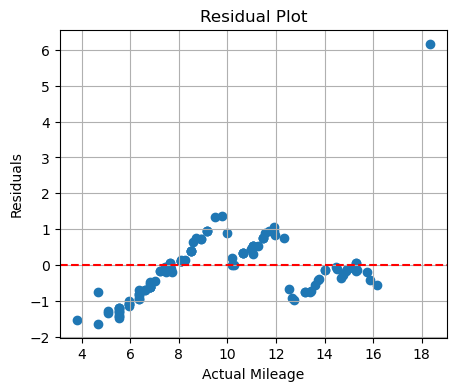

In [43]:
residuals = y_test - y_pred
plt.figure(figsize=(5, 4))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Mileage")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [44]:
## Lets try Using PolynomialFeatures

In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = SGDRegressor(max_iter=2000, alpha=0.001)
poly_model.fit(X_train_poly, y_train)



SGDRegressor(alpha=0.001, max_iter=2000)

In [46]:
y_pred_poly = poly_model.predict(X_test_poly)

In [47]:
#### Plot residuals again


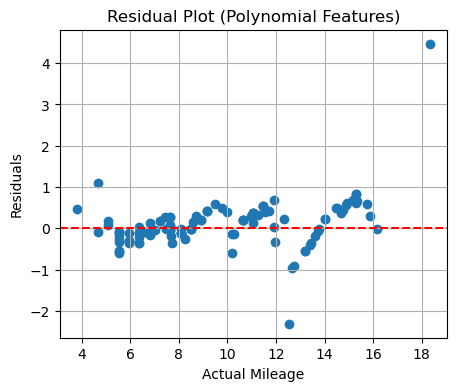

In [48]:
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(5, 4))
plt.scatter(y_test, residuals_poly)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (Polynomial Features)")
plt.xlabel("Actual Mileage")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [49]:
X_test_poly = poly.transform(X_test_scaled)

In [50]:
print(X_train_scaled.shape, X_test_scaled.shape)

(273, 3) (118, 3)


In [51]:
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)  # Apply same transformation

In [52]:
print(X_train_poly.shape, X_test_poly.shape)

(273, 9) (118, 9)


In [53]:
## Evaluate Polynomial Model

In [54]:
y_pred = poly_model.predict(X_test_poly)

# Evaluate Performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"New Accuracy after Polynomial: {r2:.2f}")

New Accuracy after Polynomial: 0.97


In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(poly_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-Validation R²:", scores)
print("Mean R²:", scores.mean())


Cross-Validation R²: [0.93415573 0.84842461 0.93272834 0.92212269 0.79754284]
Mean R²: 0.8869948407902168


In [56]:
### Lets Save the model using pickle and save scaler(important for prediction)


In [ ]:
import pickle

with open('Car_mileage_pred_model_SGD.pkl', 'wb') as f:
    pickle.dump(poly_model, f)

# Save the scaler to a file (important for prediction)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    
# Save the polynomial transformer
with open('poly_transformer.pkl', 'wb') as f:
    pickle.dump(poly, f)
    
import os
print(os.getcwd())